In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [49]:
palette = ['#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [50]:
data = pd.read_csv('MLOn1.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn
0,407456,1,1,1,2,71.32420,0.000547,2.136660,30.6917,482601992,...,1101413,1.03377,1.03377,121.000,121.000,172.8090,674841.0,ns3::ThompsonSamplingWifiManager,B,0
1,407456,2,1,1,2,71.34540,0.000547,2.139140,30.6654,482244440,...,1101413,1.01367,1.01367,120.994,120.994,172.5420,675122.0,ns3::ThompsonSamplingWifiManager,B,0
2,407456,3,1,1,2,71.25970,0.000544,2.135450,30.7564,483686872,...,1101413,1.01721,1.01721,121.000,121.000,172.2400,675973.0,ns3::ThompsonSamplingWifiManager,B,0
3,407456,4,1,1,2,71.06560,0.000540,2.123940,30.9651,486953736,...,1101413,1.01905,1.01905,120.998,120.998,171.9960,676873.0,ns3::ThompsonSamplingWifiManager,B,0
4,407456,1,1,1,2,71.32190,0.000546,2.136180,30.6965,482640192,...,1101413,1.02326,1.02326,120.980,120.980,172.5590,674742.0,ns3::ThompsonSamplingWifiManager,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,407483,4,1,1,2,60.83130,0.000346,1.751200,41.9136,659192952,...,1101413,1.00910,1.00910,121.000,121.000,149.3900,755481.0,ns3::ThompsonSamplingWifiManager,C,2
572,407483,1,1,1,3,4.42577,0.000021,0.136466,102.2700,1608475176,...,1101413,1.00707,1.00707,121.000,121.000,22.0440,143653.0,ns3::ThompsonSamplingWifiManager,D,2
573,407483,2,1,1,3,4.57521,0.000021,0.151834,102.1190,1605960088,...,1101413,1.01698,1.01698,121.000,121.000,22.4017,159581.0,ns3::ThompsonSamplingWifiManager,D,2
574,407483,3,1,1,3,50.19770,0.000226,1.464220,53.2939,838152312,...,1101413,1.01008,1.01008,120.997,120.997,124.0560,803167.0,ns3::ThompsonSamplingWifiManager,D,2


In [51]:
# Utwórz kolumny logiczne
data = data.copy()
data['flow_leq_MLOn'] = data['flow'] <= data['MLOn']
data['flow_gt_MLOn'] = data['flow'] > data['MLOn']

In [52]:
df0 = (
    data[data['flow_leq_MLOn']]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'MLOn'], as_index=False)
    .mean(numeric_only=True)
    .assign(flow='≤MLOn')
)

df1 = (
    data[data['flow_gt_MLOn']]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'MLOn'], as_index=False)
    .mean(numeric_only=True)
    .assign(flow='>MLOn')
)

#  Suma flow 0 + 1
df_sum = (
    data
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'MLOn'], as_index=False)
        .mean(numeric_only=True)
        .assign(flow='1+2')                       # sztuczna etykieta – tylko żeby było wiadomo
)

In [53]:
df_sum

,scenario,distance,linksNumber,rngRun,MLOn,flow,nStations,loss,jitter,latency,...,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,flow_leq_MLOn,flow_gt_MLOn
0,B,1,2,407456,0,1+2,1.0,71.248725,0.000544,2.133798,...,316670.00,1101413.0,1.020925,1.020925,120.99800,120.99800,172.396750,675702.25,0.00,1.00
1,B,1,2,407456,1,1+2,1.0,49.142795,0.000302,1.425744,...,560148.00,1101413.0,1.015683,1.015683,120.99900,120.99900,122.646650,585941.00,0.25,0.75
2,B,1,2,407456,2,1+2,1.0,48.656050,0.000224,1.480573,...,565508.75,1101413.0,1.018677,1.018677,120.99875,120.99875,121.531750,828140.50,0.50,0.50
3,B,1,2,407456,3,1+2,1.0,48.099875,0.000210,1.440758,...,571635.00,1101413.0,1.017297,1.017297,120.99875,120.99875,119.385000,823108.00,0.75,0.25
4,B,1,2,407456,4,1+2,1.0,47.416425,0.000204,1.436487,...,579162.50,1101413.0,1.014275,1.014275,120.99875,120.99875,117.904000,831957.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,D,1,3,407482,3,1+2,1.0,25.496925,0.000086,1.091260,...,820586.50,1101413.0,1.005918,1.005918,120.99975,120.99975,69.149975,887593.25,0.75,0.25
140,D,1,3,407482,4,1+2,1.0,24.480175,0.000081,1.114718,...,831785.25,1101413.0,1.006613,1.006613,121.00000,121.00000,67.305575,927189.25,1.00,0.00
141,D,1,3,407483,0,1+2,1.0,71.287750,0.000545,2.135413,...,316240.25,1101413.0,1.026642,1.026642,120.99650,120.99650,172.477000,675288.75,0.00,1.00
142,D,1,3,407483,1,1+2,1.0,49.022122,0.000302,1.421718,...,561477.00,1101413.0,1.020840,1.020840,120.99675,120.99675,122.454600,581636.25,0.25,0.75


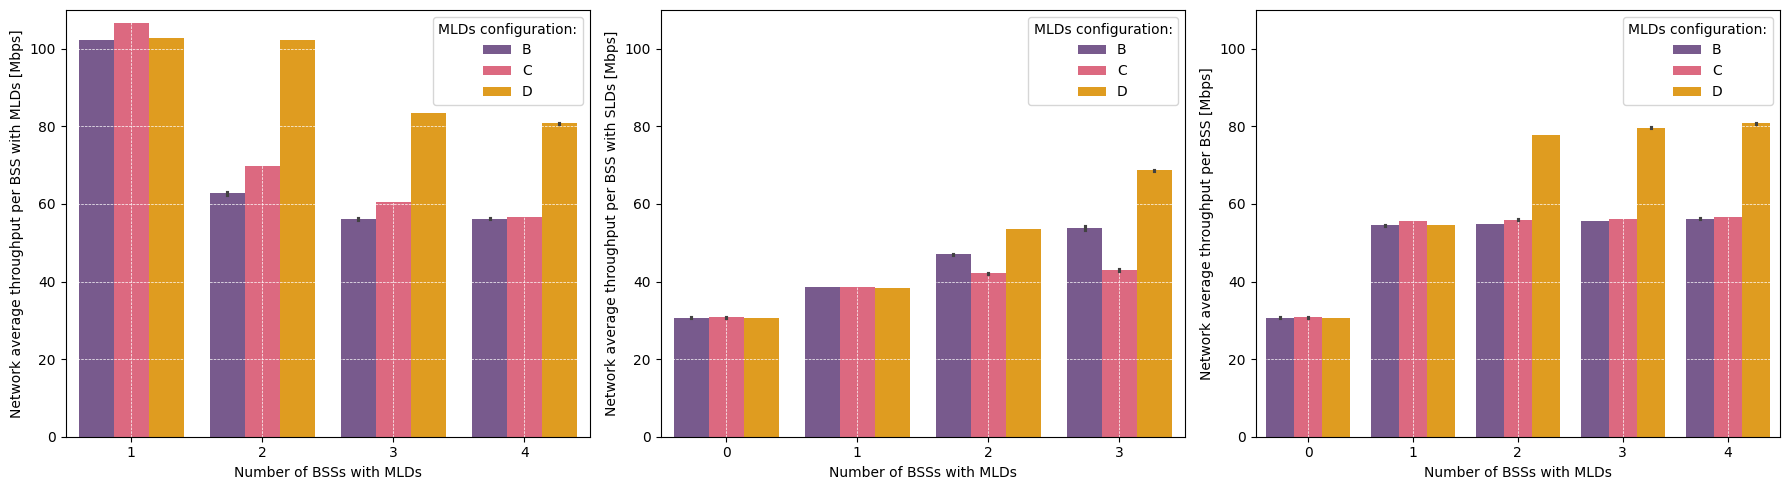

In [54]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average throughput per BSS with MLDs [Mbps]'),
    (df1, 'Network average throughput per BSS with SLDs [Mbps]'),
    (df_sum, 'Network average throughput per BSS [Mbps]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='throughput', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 110)
    else:
        axes[i].set_ylim(0, 110) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_thr_flows3.svg', bbox_inches='tight')
plt.show()

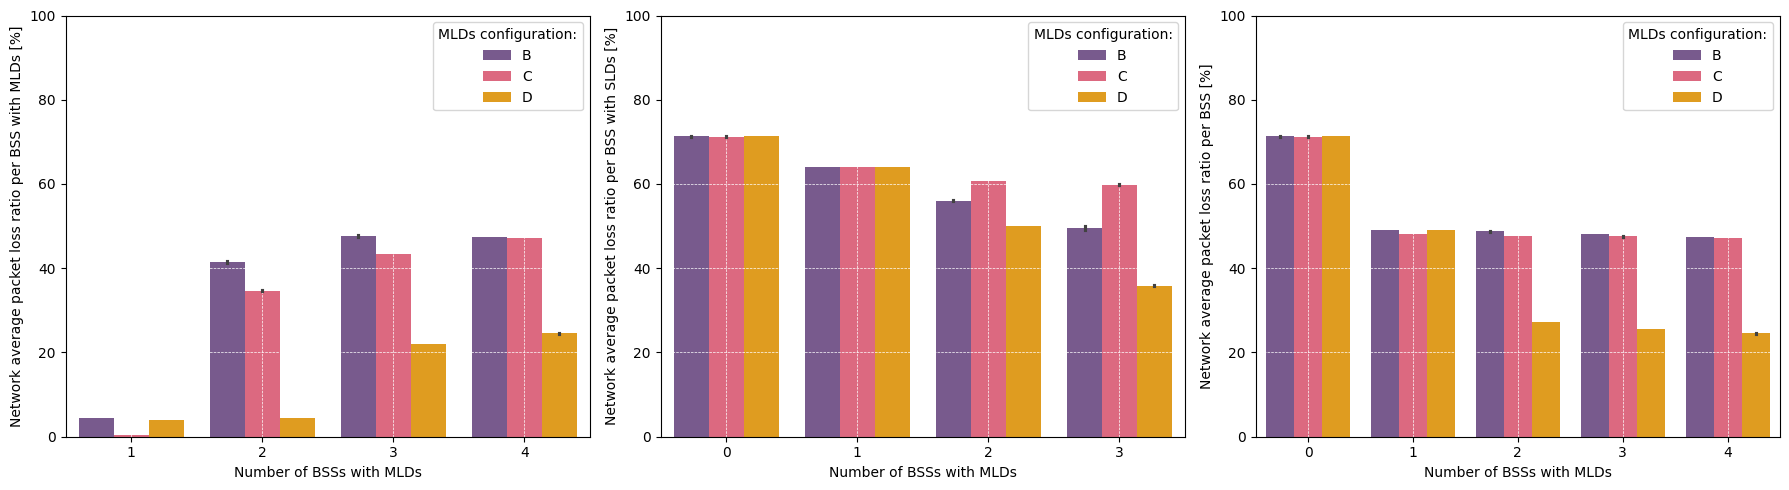

In [55]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average packet loss ratio per BSS with MLDs [%]'),
    (df1, 'Network average packet loss ratio per BSS with SLDs [%]'),
    (df_sum, 'Network average packet loss ratio per BSS [%]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='loss', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 100)
    else:
        axes[i].set_ylim(0, 100) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_loss_flows3.svg', bbox_inches='tight')
plt.show()

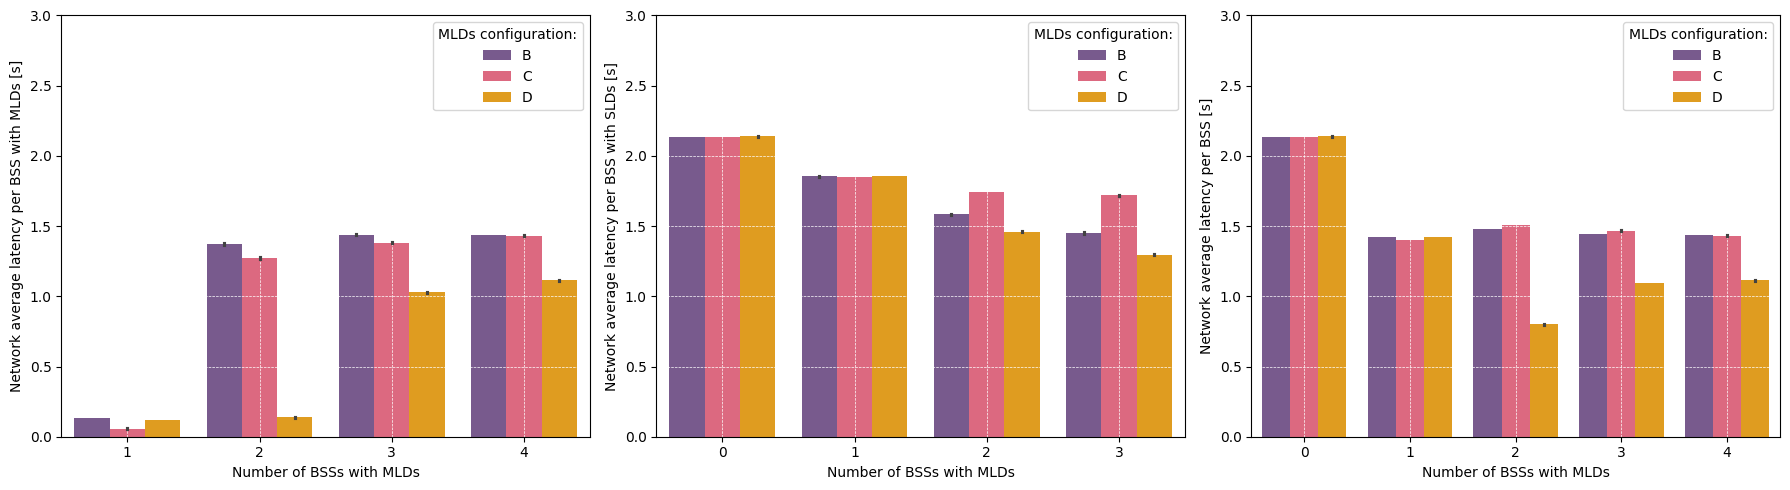

In [56]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average latency per BSS with MLDs [s]'),
    (df1, 'Network average latency per BSS with SLDs [s]'),
    (df_sum, 'Network average latency per BSS [s]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='latency', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 3)
    else:
        axes[i].set_ylim(0, 3) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_latency_flows3.svg', bbox_inches='tight')
plt.show()

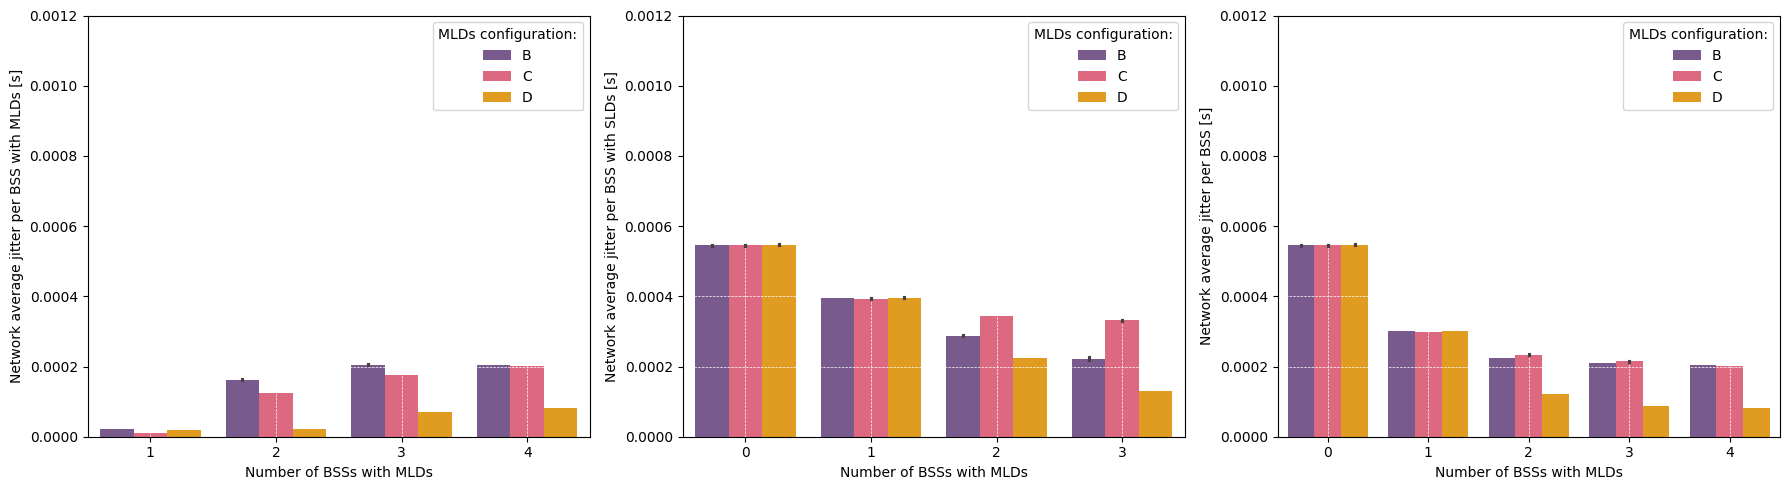

In [57]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average jitter per BSS with MLDs [s]'),
    (df1, 'Network average jitter per BSS with SLDs [s]'),
    (df_sum, 'Network average jitter per BSS [s]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='jitter', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 0.0012)
    else:
        axes[i].set_ylim(0, 0.0012) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_jitter_flows3.svg', bbox_inches='tight')
plt.show()